In [30]:
import numpy as np
import math
x=np.linspace(-math.pi,math.pi,2000) #生成均匀间隔的数列
y=np.sin(x)
a=np.random.randn()
b=np.random.randn()
c=np.random.randn()
d=np.random.randn()
learning_rate=1e-6
for t in range(2000):
    #forward apss compute predict y
    y_pred=a+b*x+c*x**2+d*x**3
    #compute and print loss
    loss=np.square(y_pred-y).sum()
    
    #backprop to compute gradients of a,b,c,d wiht respect to loss
    grad_y_pred=2.0*(y_pred-y)
    grad_a=grad_y_pred.sum()
    grad_b=(grad_y_pred*x).sum()
    grad_c=(grad_y_pred*x**2).sum()
    grad_d=(grad_y_pred*x**3).sum()
    if t%100 ==99:
        print(t,loss,grad_a,grad_b,grad_c,grad_d)
    #update weights
    a-=learning_rate*grad_a
    b-=learning_rate*grad_b
    c-=learning_rate*grad_c
    d-=learning_rate*grad_d
print(f'result: y={a}+{b}x+{c}x^2 +{d}x^3')

99 2676.5297283202763 -1001.4575332904681 -3097.214202429039 174.98220728565593 440.5517495169661
199 1786.7249537493421 -842.7602562466288 -2518.5714020341193 145.39067734340392 358.24485002662357
299 1194.2829125440662 -708.9487048586209 -2048.034618390084 122.30544866274829 291.31509002362213
399 799.6585079230865 -596.3833860375116 -1665.4067439726277 102.88605795387741 236.8896068405851
499 536.6806753465912 -501.69094138150035 -1354.2640334125604 86.55003556160807 192.6322657179776
599 361.34832319456984 -422.03355518764045 -1101.2511380973492 72.80781093853955 156.64338461506435
699 244.39201951433904 -355.02399388327296 -895.5078472435926 61.247546569622386 127.37819311945782
799 166.33442667248192 -298.6540636011527 -728.202929134193 51.52279559626834 103.58052542244275
899 114.20916684954558 -251.23442708722177 -592.1550633328792 43.342119231458014 84.22890122744144
999 79.38066547478428 -211.34397634762638 -481.5245929423452 36.460352698912914 68.49268019299967
1099 56.09508

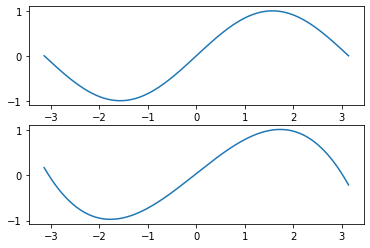

In [27]:
from matplotlib.pylab import plt
plt.figure(1)
plt.subplot(211)
plt.plot(x,y)
plt.subplot(212)
plt.plot(x,y_pred)
plt.show()

In [37]:
%%time

import torch
import math

dtype = torch.float
device = torch.device("cpu")

device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
#     if t % 100 == 99:
#         print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')    

Result: y = -0.021984070539474487 + 0.8446479439735413 x + 0.0037926165387034416 x^2 + -0.09161027520895004 x^3
Wall time: 694 ms
